In [1]:
import os
import sys
import json

sys.path.append("src")

from semi_supervised_mlp import LatentMLPClassifier, load_latents_and_labels
from train_latent_classifier import train_latent_classifier

In [2]:
latents_path = "latents.npy"
labels_path = "cluster_labels.npy"
save_path = "mlp_classifier.pth"
log_path = "mlp_training_log.json"

In [3]:
train_latent_classifier(
    latents_path=latents_path,
    labels_path=labels_path,
    save_path=save_path,
    log_path=log_path,
    epochs=30,
    batch_size=64,
    lr=1e-3,
    early_stopping_patience=5
)

Epoch 1/30, Loss: 0.00974071
Epoch 2/30, Loss: 0.00000016
Epoch 3/30, Loss: 0.00000027
Epoch 4/30, Loss: 0.00000053
Epoch 5/30, Loss: 0.00000292
Epoch 6/30, Loss: 0.00000002
Epoch 7/30, Loss: 0.00000008
Epoch 8/30, Loss: 0.00000006
Epoch 9/30, Loss: 0.00000030
Epoch 10/30, Loss: 0.00000002
Epoch 11/30, Loss: 0.00000015
⏹️ Early stopping at epoch 11. Best loss: 0.000000017
✅ Model saved to mlp_classifier.pth | Log: mlp_training_log.json | Loss plot: mlp_loss_curve.png


In [4]:
with open(log_path, 'r') as f:
    log = json.load(f)

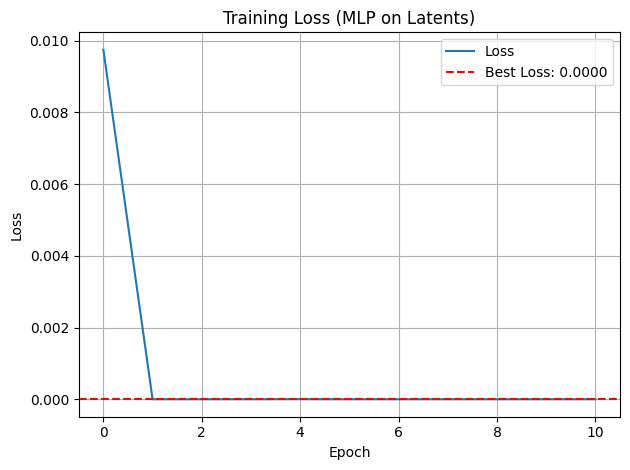

In [5]:
import matplotlib.pyplot as plt

plt.plot(log["loss_curve"], label="Loss")
plt.axhline(log["best_loss"], color='red', linestyle='--', label=f"Best Loss: {log['best_loss']:.4f}")
plt.title("Training Loss (MLP on Latents)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latents, labels = load_latents_and_labels(latents_path, labels_path)

model = LatentMLPClassifier(input_dim=latents.shape[1])
model.load_state_dict(torch.load(save_path))
model.to(device)
model.eval()

with torch.no_grad():
    preds = model(latents.to(device)).cpu().numpy()
    preds_bin = (preds >= 0.5).astype(int)
    y_true = labels.numpy()

In [7]:
print("✅ Evaluation Metrics:")
print(f"🔢 Accuracy: {accuracy_score(y_true, preds_bin):.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_true, preds_bin))
print("🧮 Confusion Matrix:")
print(confusion_matrix(y_true, preds_bin))

✅ Evaluation Metrics:
🔢 Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3445
         1.0       1.00      1.00      1.00      4134

    accuracy                           1.00      7579
   macro avg       1.00      1.00      1.00      7579
weighted avg       1.00      1.00      1.00      7579

🧮 Confusion Matrix:
[[3445    0]
 [   0 4134]]
